## Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import category_encoders as ce
%matplotlib inline


## Load LendingClub dataset

In [2]:
data = 'lending-club-data.csv'

df = pd.read_csv(data)

/home/newuser/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (19,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Exploratory data analysis

In [3]:
# view dimensions of dataset
df.shape

(122607, 68)

In [4]:
# preview the dataset
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sub_grade_num,delinq_2yrs_zero,pub_rec_zero,collections_12_mths_zero,short_emp,payment_inc_ratio,final_d,last_delinq_none,last_record_none,last_major_derog_none
0,1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,...,0.4,1.0,1.0,1.0,0,8.14350,20141201T000000,1,1,1
1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,...,0.8,1.0,1.0,1.0,1,2.39320,20161201T000000,1,1,1
2,1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,...,1.0,1.0,1.0,1.0,0,8.25955,20141201T000000,1,1,1
3,1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,...,0.2,1.0,1.0,1.0,0,8.27585,20141201T000000,0,1,1
4,1075269,1311441,5000,5000,5000,36 months,7.90,156.46,A,A4,...,0.8,1.0,1.0,1.0,0,5.21533,20141201T000000,1,1,1


#### View summary of dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122607 entries, 0 to 122606
Data columns (total 68 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           122607 non-null  int64  
 1   member_id                    122607 non-null  int64  
 2   loan_amnt                    122607 non-null  int64  
 3   funded_amnt                  122607 non-null  int64  
 4   funded_amnt_inv              122607 non-null  int64  
 5   term                         122607 non-null  object 
 6   int_rate                     122607 non-null  float64
 7   installment                  122607 non-null  float64
 8   grade                        122607 non-null  object 
 9   sub_grade                    122607 non-null  object 
 10  emp_title                    115767 non-null  object 
 11  emp_length                   118516 non-null  object 
 12  home_ownership               122607 non-null  object 
 13 

### Summary of variables

There are 68 variables in the dataset. All the variables are of categorical data type.
'bad_loans' is the target variable.

In [6]:
# Explor bad_loans variable
df['bad_loans'].value_counts()

0    99457
1    23150
Name: bad_loans, dtype: int64

<AxesSubplot:xlabel='bad_loans', ylabel='count'>

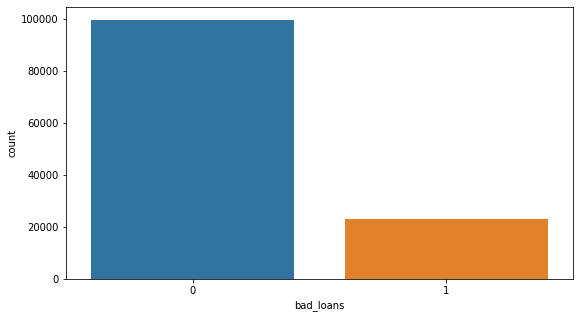

In [7]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x="bad_loans", data=df)

we can see that there are 99457 safe loans and 23150 risky loans

<AxesSubplot:xlabel='grade', ylabel='count'>

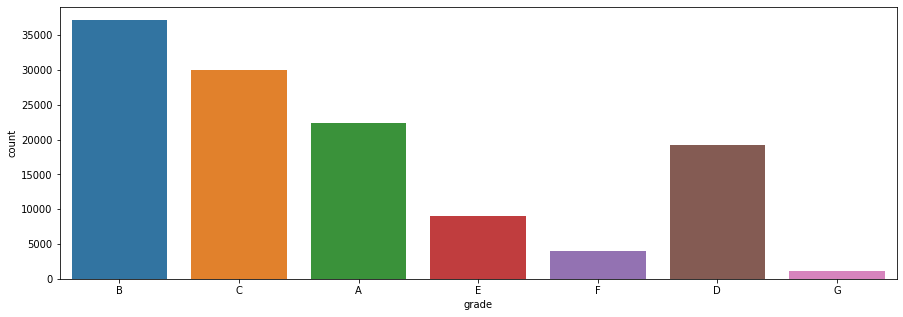

In [8]:
plt.figure(figsize=(15,5))
sns.countplot(x="grade", data=df)

<AxesSubplot:xlabel='grade', ylabel='count'>

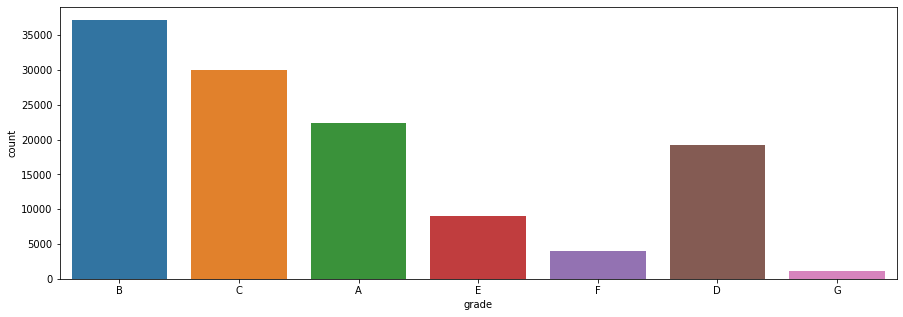

In [9]:
plt.figure(figsize=(15,5))
sns.countplot(x="grade", data=df)


<AxesSubplot:xlabel='home_ownership', ylabel='count'>

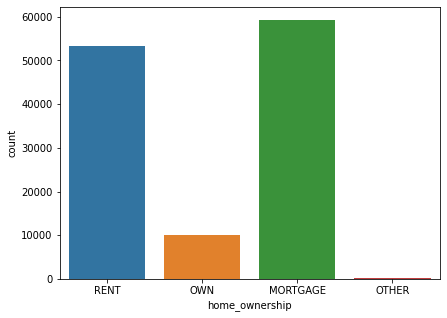

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x='home_ownership',data=df)

Text(0.5, 1.0, 'Null Values in Data Frame')

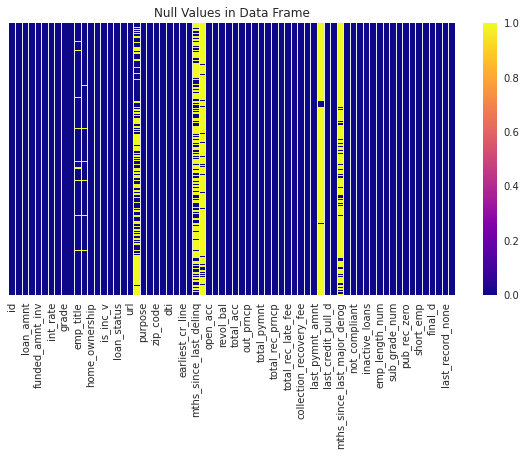

In [11]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cmap='plasma')
plt.title('Null Values in Data Frame')

###### this columns have  null values

In [12]:
# get the number of missing data points per column
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

emp_title                        6840
emp_length                       4091
annual_inc                          4
desc                            61902
title                              11
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq          72107
mths_since_last_record         110076
open_acc                           29
pub_rec                            29
total_acc                          29
last_pymnt_d                      336
next_pymnt_d                   119700
last_credit_pull_d                  6
collections_12_mths_ex_med        145
mths_since_last_major_derog    107147
delinq_2yrs_zero                   29
pub_rec_zero                       29
collections_12_mths_zero          145
payment_inc_ratio                   4
dtype: int64


In [13]:
missing_value_count = df.isnull().sum()

In [14]:
# how many total missing values do we have?
import numpy as np
total_cells = np.product(df.shape)
total_missing = missing_value_count.sum()
# percent of data that is missing
(total_missing / total_cells * 100) 

5.790212534645608

In [15]:
print('Tottal number of our cells is :',total_cells)
print('Tottal number of our missing value is :',total_missing)

Tottal number of our cells is : 8337276
Tottal number of our missing value is : 482746


Wow, almost a **6%** of the cells in this dataset are empty! In the next step, we're going to take a closer look at some of the columns with missing values and try to figure out what might be going on with them.

In [16]:
df['collections_12_mths_zero'].value_counts()

1.0    122062
0.0       400
Name: collections_12_mths_zero, dtype: int64

In [17]:
df['collections_12_mths_zero'].fillna(method = 'bfill', axis = 0, inplace = True)

In [18]:
df['emp_title'].value_counts()

Teacher                                     458
Manager                                     452
US Army                                     323
Bank of America                             256
Supervisor                                  199
                                           ... 
ProAssurance Corporation                      1
Strategic Outsourcing Inc/Rodeo Plastic       1
Schneider Logistics                           1
Regency Hospita                               1
Falcon Insurance                              1
Name: emp_title, Length: 77167, dtype: int64

In [19]:
df['emp_title'].fillna(method = 'bfill',axis=0,inplace = True)

In [20]:
df['emp_length'].value_counts()

10+ years    34100
2 years      12048
< 1 year     11072
3 years      10333
5 years       9561
1 year        8701
4 years       8544
6 years       7629
7 years       6704
8 years       5373
9 years       4451
Name: emp_length, dtype: int64

In [21]:
df['emp_length'].fillna('10+ years',inplace = True)

In [22]:
df['annual_inc'].value_counts()

60000.0     4768
50000.0     4015
40000.0     3220
65000.0     3214
45000.0     3109
            ... 
62349.0        1
257000.0       1
33316.0        1
48732.0        1
73558.0        1
Name: annual_inc, Length: 11238, dtype: int64

In [23]:
df['annual_inc'].fillna(df['annual_inc'].mean(),inplace=True)
df['annual_inc'].isnull().sum()

0

In [24]:
df['desc'].value_counts()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   227
Debt Consolidation                                                                                                                                                                                               

In [25]:
df['desc'].fillna("Unknown",inplace = True)

In [26]:
df['title'].value_counts()

Debt consolidation                      17773
Debt Consolidation                       7220
Credit card refinancing                  5223
Debt Consolidation Loan                  2424
Consolidation                            2193
                                        ...  
No more revolving credit                    1
Wedding Breathing Room                      1
Lower interest rate on existing loan        1
one payment on credit cards                 1
para mim                                    1
Name: title, Length: 36602, dtype: int64

In [27]:
df['title'].fillna("Unknown",inplace = True)

In [28]:
df['earliest_cr_line'].value_counts()

20001001T000000    1103
19991001T000000    1049
20001101T000000     997
20011001T000000     970
19991101T000000     965
                   ... 
19460101T000000       1
19501201T000000       1
19670601T000000       1
19641201T000000       1
19611101T000000       1
Name: earliest_cr_line, Length: 597, dtype: int64

In [29]:
df['earliest_cr_line'].fillna(
    '20001001T000000',
    inplace=True)

In [30]:
df['inq_last_6mths'].value_counts()

0.0     56094
1.0     34938
2.0     18129
3.0      8962
4.0      2397
5.0      1101
6.0       512
7.0       183
8.0       117
9.0        50
10.0       24
11.0       15
12.0       15
15.0        9
14.0        6
13.0        6
18.0        4
16.0        3
24.0        2
17.0        2
19.0        2
20.0        1
27.0        1
33.0        1
25.0        1
32.0        1
31.0        1
28.0        1
Name: inq_last_6mths, dtype: int64

In [31]:
df['inq_last_6mths'].fillna(0,inplace = True)

In [32]:
df['mths_since_last_delinq'].value_counts()

12.0     881
17.0     881
15.0     880
9.0      872
18.0     872
        ... 
103.0      1
139.0      1
120.0      1
148.0      1
115.0      1
Name: mths_since_last_delinq, Length: 116, dtype: int64

In [33]:
df['mths_since_last_delinq'].fillna("Unknown",inplace = True)

In [34]:
df.drop(['mths_since_last_record'],
             axis = 1,
             inplace = True)

In [35]:
df['open_acc'].value_counts()

9.0     11756
8.0     11657
7.0     10828
10.0    10753
11.0     9968
6.0      9472
12.0     8672
13.0     7120
5.0      6951
14.0     6007
15.0     4751
4.0      4523
16.0     3836
17.0     3019
18.0     2441
3.0      2430
19.0     1830
20.0     1366
21.0     1097
2.0       941
22.0      814
23.0      607
24.0      490
25.0      321
26.0      215
27.0      161
28.0      100
29.0       75
30.0       65
1.0        62
31.0       51
32.0       39
33.0       29
34.0       23
35.0       22
37.0       19
38.0       14
36.0       13
39.0        7
40.0        7
41.0        6
0.0         3
46.0        3
45.0        2
50.0        2
49.0        2
48.0        1
52.0        1
47.0        1
58.0        1
43.0        1
76.0        1
42.0        1
44.0        1
Name: open_acc, dtype: int64

In [36]:
df['open_acc'].fillna(df['open_acc'].mean(),
                     inplace = True)

In [37]:
df['pub_rec'].value_counts()

0.0     111322
1.0      10283
2.0        702
3.0        173
4.0         52
5.0         23
6.0         16
7.0          3
11.0         1
9.0          1
10.0         1
8.0          1
Name: pub_rec, dtype: int64

In [38]:
df['pub_rec'].fillna(0, inplace = True)

In [39]:
df['total_acc'].value_counts()

20.0     4450
21.0     4441
17.0     4389
19.0     4342
22.0     4320
         ... 
81.0        1
91.0        1
83.0        1
118.0       1
94.0        1
Name: total_acc, Length: 89, dtype: int64

In [40]:
df['total_acc'].fillna(method = 'bfill',
                      inplace = True)

In [41]:
df['last_pymnt_d'].value_counts()

20150101T000000    6925
20141001T000000    6659
20140901T000000    6338
20140701T000000    6312
20140801T000000    6307
                   ... 
20080601T000000      20
20080301T000000      18
20080101T000000      11
20080201T000000       8
20071201T000000       2
Name: last_pymnt_d, Length: 87, dtype: int64

In [42]:
df.drop(['last_pymnt_d'],
             axis = 1,
             inplace = True)

In [43]:
df.drop(['next_pymnt_d'],
             axis = 1,
             inplace = True)

In [44]:
df['last_credit_pull_d'].value_counts()

20150201T000000    36203
20150101T000000     8935
20141201T000000     6455
20141001T000000     5669
20141101T000000     5408
                   ...  
20071201T000000        3
20080701T000000        2
20080501T000000        1
20070701T000000        1
20080601T000000        1
Name: last_credit_pull_d, Length: 92, dtype: int64

In [45]:
df['last_credit_pull_d'].fillna(method = 'bfill',
                      inplace = True)

In [46]:
df['collections_12_mths_ex_med'].value_counts()

0.0    122062
1.0       376
2.0        22
5.0         1
3.0         1
Name: collections_12_mths_ex_med, dtype: int64

In [47]:
df['collections_12_mths_ex_med'].fillna(0,
                                        inplace = True)

In [48]:
df.drop(['mths_since_last_major_derog'],
             axis = 1,
             inplace = True)

In [49]:
df['delinq_2yrs_zero'].value_counts()

1.0    105185
0.0     17393
Name: delinq_2yrs_zero, dtype: int64

In [50]:
df['delinq_2yrs_zero'].fillna(1,
                             inplace = True)

In [51]:
df['delinq_2yrs'].value_counts()

0.0     105185
1.0      12350
2.0       3255
3.0       1006
4.0        365
5.0        202
6.0         98
7.0         43
8.0         27
9.0         15
11.0         8
10.0         8
12.0         7
14.0         4
15.0         2
18.0         1
29.0         1
13.0         1
Name: delinq_2yrs, dtype: int64

In [52]:
df['delinq_2yrs'].fillna(0,
                         inplace = True)

In [53]:
df['pub_rec_zero'].value_counts()

1.0    111322
0.0     11256
Name: pub_rec_zero, dtype: int64

In [54]:
df['pub_rec_zero'].fillna(1,
                             inplace = True)

In [55]:
df['payment_inc_ratio'].value_counts()

9.98160     44
7.98528     37
9.58224     31
13.30880    31
5.71560     29
            ..
1.12548      1
3.28029      1
7.21120      1
6.56910      1
5.00000      1
Name: payment_inc_ratio, Length: 94247, dtype: int64

In [56]:
df['payment_inc_ratio'].fillna(method = 'bfill',
                              inplace = True)

In [57]:
df.shape

(122607, 64)

In [58]:
missing_value_count = df.isnull().sum()
total_missing_value = missing_value_count.sum()
total_missing_value

0

### statistics overview on our data

In [59]:
df.describe(include = 'all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sub_grade_num,delinq_2yrs_zero,pub_rec_zero,collections_12_mths_zero,short_emp,payment_inc_ratio,final_d,last_delinq_none,last_record_none,last_major_derog_none
count,1.226070e+05,1.226070e+05,122607.000000,122607.000000,122607.000000,122607,122607.000000,122607.000000,122607,122607,...,122607.000000,122607.000000,122607.000000,122607.000000,122607.000000,122607.000000,122607,122607.000000,122607.000000,122607.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7,35,...,NaN,NaN,NaN,NaN,NaN,NaN,115,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,NaN,NaN,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,20160501T000000,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,97801,NaN,NaN,37172,9036,...,NaN,NaN,NaN,NaN,NaN,NaN,3102,NaN,NaN,NaN
mean,4.728452e+06,5.493222e+06,12809.733743,12736.123753,12497.828395,NaN,13.639487,396.623285,NaN,NaN,...,0.597509,0.858140,0.908194,0.996738,0.123672,7.564873,NaN,0.588115,0.897795,0.873906
std,5.938517e+06,6.604693e+06,7932.313398,7887.167118,7946.731527,NaN,4.390836,239.475936,NaN,NaN,...,0.278934,0.348908,0.288752,0.057025,0.329208,4.127665,NaN,0.492177,0.302918,0.331957
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,NaN,5.420000,15.670000,NaN,NaN,...,0.200000,0.000000,0.000000,0.000000,0.000000,0.028895,NaN,0.000000,0.000000,0.000000
25%,8.532925e+05,1.064872e+06,6700.000000,6625.000000,6271.000000,NaN,10.620000,215.985000,NaN,NaN,...,0.400000,1.000000,1.000000,1.000000,0.000000,4.362545,NaN,0.000000,1.000000,1.000000
50%,1.621401e+06,1.879659e+06,11000.000000,10950.000000,10500.000000,NaN,13.480000,348.180000,NaN,NaN,...,0.600000,1.000000,1.000000,1.000000,0.000000,6.965760,NaN,1.000000,1.000000,1.000000
75%,6.699942e+06,8.117948e+06,17600.000000,17425.000000,17000.000000,NaN,16.290000,521.930000,NaN,NaN,...,0.800000,1.000000,1.000000,1.000000,0.000000,10.216100,NaN,1.000000,1.000000,1.000000


## Feature Engineering

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

#### Exploring the target column

The target column (label column) of the dataset that we are interested in is called `bad_loans`. In this column **1** means a risky (bad) loan **0** means a safe  loan.

In order to make this more intuitive and consistent with the lectures, we reassign the target to be:
* **+1** as a safe  loan, 
* **-1** as a risky (bad) loan. 

We put this in a new column called `safe_loans`.

In [60]:
df['safe_loans'] = df['bad_loans'].apply(lambda x : +1 if x == 0 else -1)
df.drop(['bad_loans'], axis = 1,inplace = True )


In [61]:
loans = df.copy()

<AxesSubplot:>

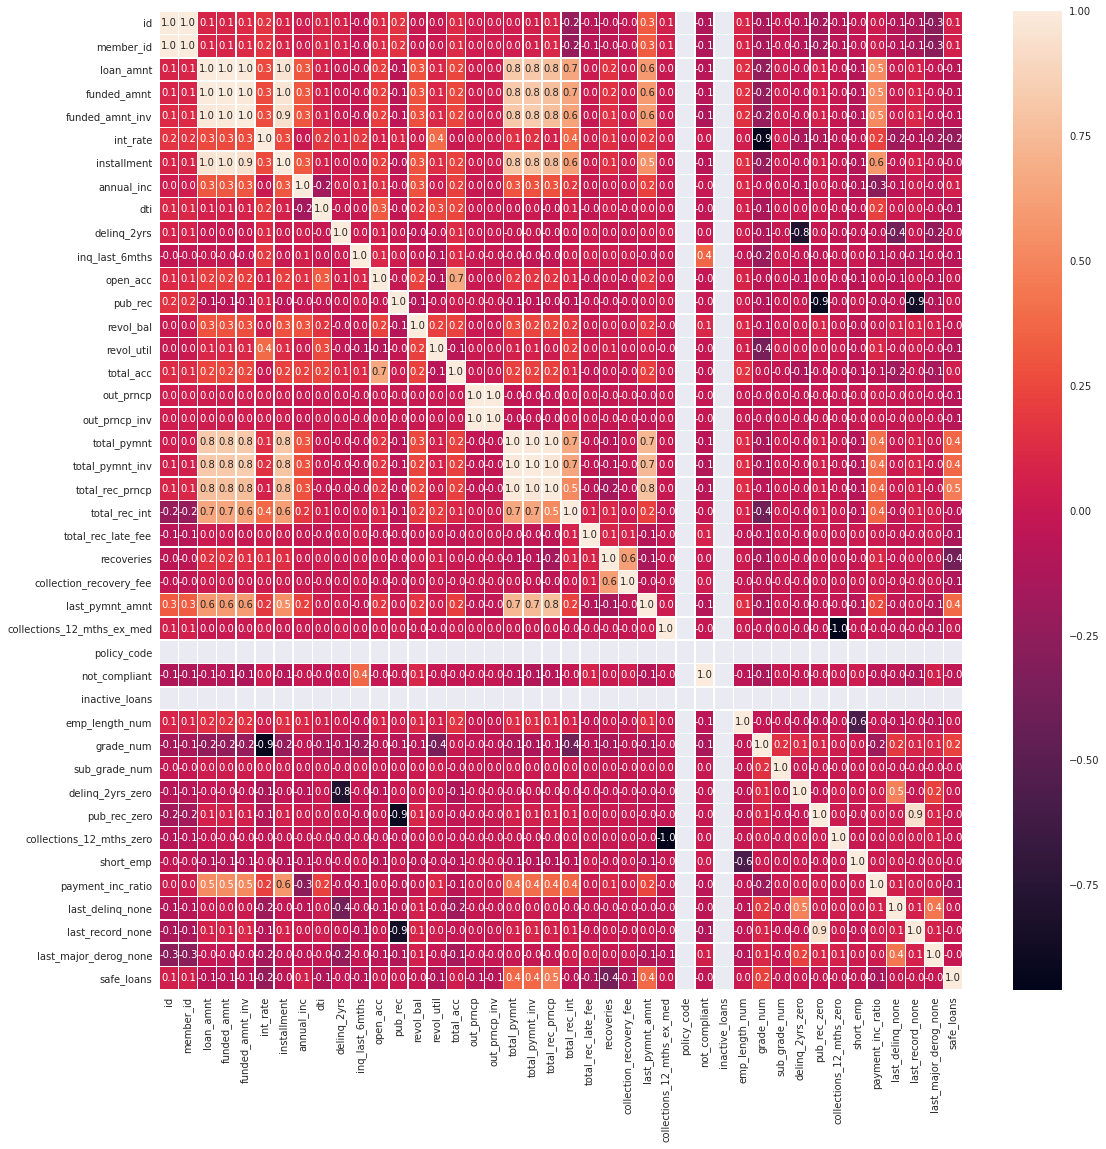

In [62]:
f, ax = plt.subplots(figsize = (18,18))
sns.heatmap(loans.corr(),
            annot = True, 
            linewidths = .5, 
            fmt = '.1f',
            ax = ax)

#### Select features and target for the model

In [63]:
features = ['loan_amnt',
            'int_rate',
            'annual_inc',
            'dti',
            'open_acc',
            'pub_rec',
            'revol_bal',
            'total_acc',
            'revol_util',
            'out_prncp',
            'total_pymnt',
            'total_rec_late_fee',
            'recoveries',
            'last_pymnt_amnt',
            'not_compliant',
            'emp_length_num',
            'grade_num',
            'sub_grade_num',
            'delinq_2yrs_zero',
            'pub_rec_zero',
            'short_emp']
target = 'safe_loans'
corr_data = loans[features + [target]]

In [64]:
corr_data.head()

,loan_amnt,int_rate,annual_inc,dti,open_acc,pub_rec,revol_bal,total_acc,revol_util,out_prncp,...,recoveries,last_pymnt_amnt,not_compliant,emp_length_num,grade_num,sub_grade_num,delinq_2yrs_zero,pub_rec_zero,short_emp,safe_loans
0,5000,10.65,24000.0,27.65,3.0,0.0,13648,9.0,83.7,0.0,...,0.00,171.62,0,11,5,0.4,1.0,1.0,0,1
1,2500,15.27,30000.0,1.00,3.0,0.0,1687,4.0,9.4,0.0,...,117.08,119.66,0,1,4,0.8,1.0,1.0,1,-1
2,2400,15.96,12252.0,8.72,2.0,0.0,2956,10.0,98.5,0.0,...,0.00,649.91,0,11,4,1.0,1.0,1.0,0,1
3,10000,13.49,49200.0,20.00,10.0,0.0,5598,37.0,21.0,0.0,...,0.00,357.48,0,11,4,0.2,1.0,1.0,0,1
4,5000,7.90,36000.0,11.20,9.0,0.0,7963,12.0,28.3,0.0,...,0.00,161.03,0,4,6,0.8,1.0,1.0,0,1


In [65]:
X = corr_data[features]
y = corr_data[target]

#### split data to training_data and testing_data 

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = .2,
                                                   random_state = 42)

In [67]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98085 entries, 114567 to 121958
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_amnt           98085 non-null  int64  
 1   int_rate            98085 non-null  float64
 2   annual_inc          98085 non-null  float64
 3   dti                 98085 non-null  float64
 4   open_acc            98085 non-null  float64
 5   pub_rec             98085 non-null  float64
 6   revol_bal           98085 non-null  int64  
 7   total_acc           98085 non-null  float64
 8   revol_util          98085 non-null  float64
 9   out_prncp           98085 non-null  float64
 10  total_pymnt         98085 non-null  float64
 11  total_rec_late_fee  98085 non-null  float64
 12  recoveries          98085 non-null  float64
 13  last_pymnt_amnt     98085 non-null  float64
 14  not_compliant       98085 non-null  int64  
 15  emp_length_num      98085 non-null  int64  
 16

## build Random Forest Classifier

#### and evaluating the model

Testing-set Accuracy score is:  0.9930266699290433
Training-set Accuracy score is:  1.0


<AxesSubplot:>

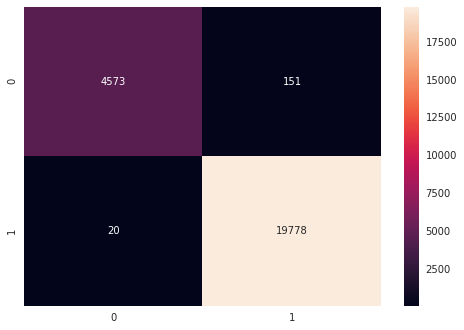

In [68]:
clf_rf = RandomForestClassifier(random_state=42)      
clr_rf = clf_rf.fit(X_train,y_train)
ac = accuracy_score(y_test,clf_rf.predict(X_test))
print('Testing-set Accuracy score is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(X_test))
y_pred_rf = clf_rf.predict(X_test)
print('Training-set Accuracy score is: ',accuracy_score(y_train,clf_rf.predict(X_train)))
sns.heatmap(cm,annot=True,fmt="d")

In [69]:
predict_labels = np.array(y_pred_rf)
true_labels = np.array(y_test)

In [70]:
# True Positive (TP): we predict a label of 1 (positive), and the true label is 1.
TP = np.sum(np.logical_and(predict_labels == +1, true_labels == +1))
 
# True Negative (TN): we predict a label of -1 (negative), and the true label is -1.
TN = np.sum(np.logical_and(predict_labels == -1, true_labels == -1))
 
# False Positive (FP): we predict a label of 1 (positive), but the true label is -1.
FP = np.sum(np.logical_and(predict_labels == +1, true_labels == -1))
 
# False Negative (FN): we predict a label of -1 (negative), but the true label is 1.
FN = np.sum(np.logical_and(predict_labels ==-1, true_labels == +1))
 
print ('TP: %i, FP: %i, TN: %i, FN: %i' % (TP,FP,TN,FN))


TP: 19778, FP: 151, TN: 4573, FN: 20


## Building another classifier model (Ada Boost Classifier)

#### and evaluate the model

In [71]:
abc = AdaBoostClassifier(n_estimators = 50, learning_rate = 1, random_state = 0)
abc.fit(X_train, y_train)
y_pred_abc = abc.predict(X_test)
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred_abc))

AdaBoost Classifier Model Accuracy: 0.9917624989805073


<AxesSubplot:>

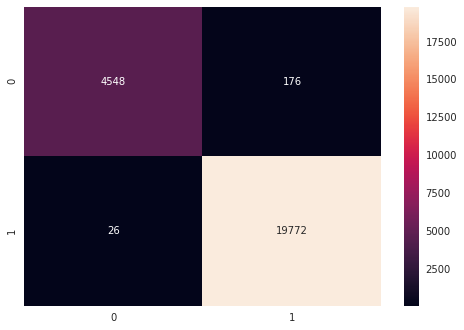

In [72]:
cm = confusion_matrix(y_test,abc.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

as we can see random forest model better then ada boost model